In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('/Users/angelinakathleen/Downloads/diabetes.xls')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

In [ ]:
df.describe().T

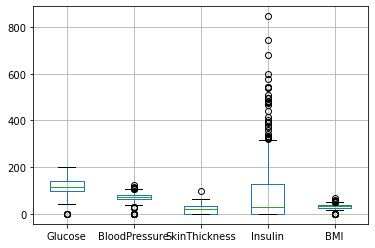

In [6]:
missing_val = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
boxplot = df.boxplot(column=missing_val)     

In [7]:
# converting zero values to null 
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [ ]:
df.isnull().sum()

In [9]:
impute_mean = ['Glucose', 'BloodPressure', 'BMI']
impute_median = ['Insulin', 'SkinThickness']
for x in impute_mean:
    df[x].fillna(df[x].mean(), inplace = True)
for x in impute_median:
    df[x].fillna(df[x].median(), inplace = True)

In [ ]:
 df.isnull().sum()

In [ ]:
df.describe().T

In [ ]:
cat = []
for col in df.columns:
    cat.append(col)
cat.remove('Outcome')
cat

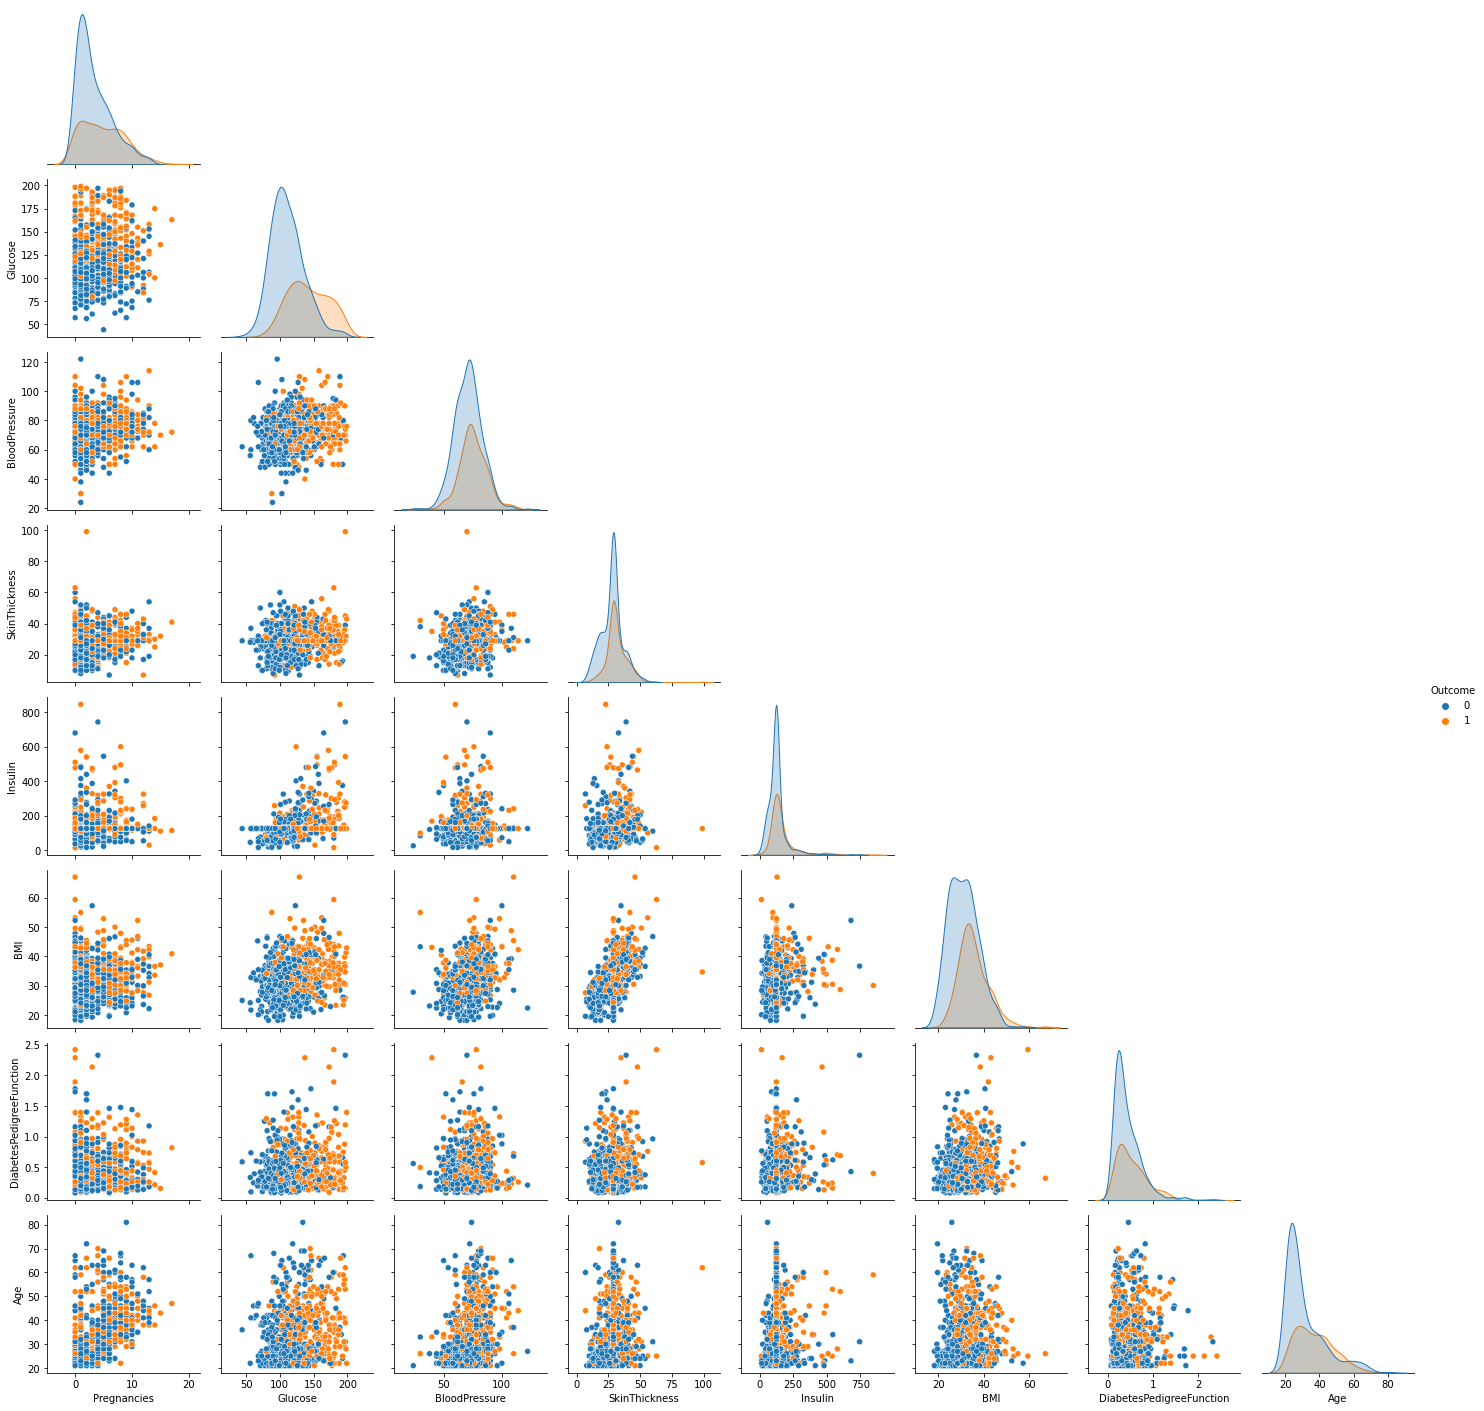

In [13]:
# scatter plot

pair = sns.PairGrid(df, hue="Outcome", diag_sharey=False, corner=True)
pair.map_lower(sns.scatterplot)
pair.map_diag(sns.kdeplot, fill=True)
pair.add_legend();

In [14]:
X = df[df.columns.drop('Outcome')]
y = df['Outcome']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
logistic = LogisticRegression(solver = 'liblinear')
dec_tree = DecisionTreeClassifier()
random_tree = RandomForestClassifier()
gbc = GradientBoostingClassifier()

scaler = StandardScaler()

model = [ logistic, dec_tree, random_tree, gbc]

In [38]:
def accuracy(X_train, X_test, y_train, y_test, models):
  name = []
  results = []
  for i in models:
    name.append(str(i))
    pipe = make_pipeline(scaler, i)
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    prec = precision_score(y_test, y_predict)
    results.append(accuracy)
    df = pd.DataFrame({'Model':name, 'Accuracy':results})
  return df

In [ ]:
all_data = accuracy(X_train, X_test, y_train, y_test, model)
all_data

gradient boosting classifier has highest accuracy

<AxesSubplot:>

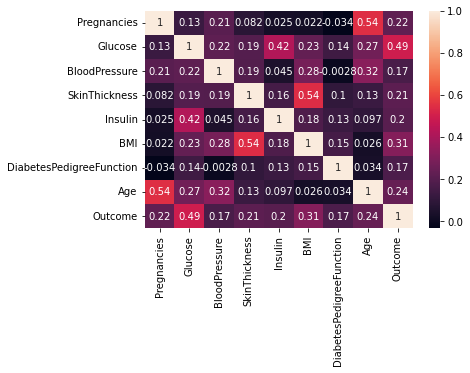

In [33]:
plot = sns.heatmap(df.corr(), annot=True)
plot

Gradient Boosting Classifier and Logistic Regression were the best model with 81.2% accuracy